In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

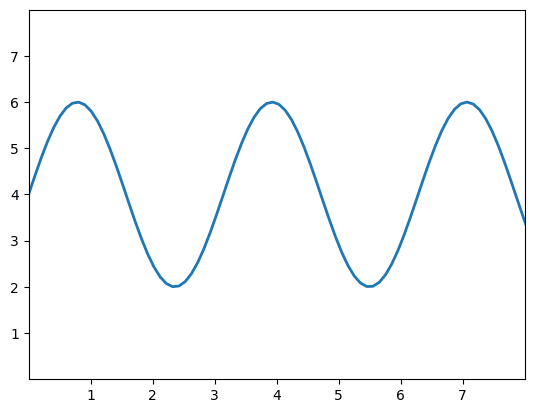

In [2]:
x = np.linspace(0, 10, 100)   # 產生 0～10 總共 100 連續數字
y = 4 + 2 * np.sin(2 * x)     # 使用 NumPy 的廣播方式，產生sin 數值的陣列y
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)  # 繪製折線圖
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),  # 設定座標軸
ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()    # 顯示圖表


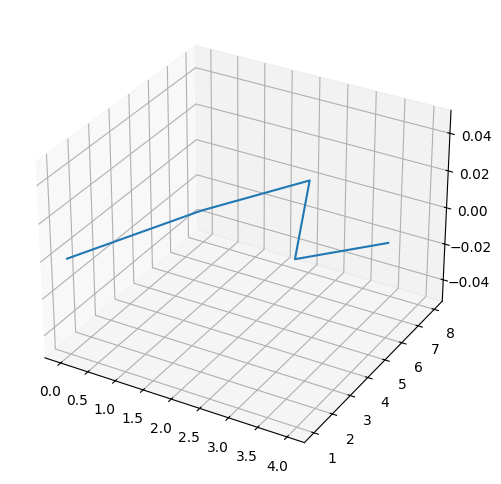

In [3]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')   # 設定為 3D 圖表
x = range(5)
y = [1,5,8,4,6]
ax.plot(x,y)
plt.show()

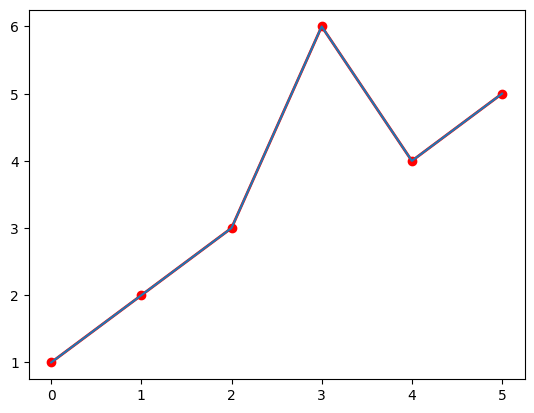

In [4]:
x = [1,2,3,6,4,5]
# 畫出顏色紅色、圓形錨點、虛線、粗細2、資料點大小6 的線條
plt.plot(x,color='r', marker='o', linewidth=2, markersize=6)
plt.plot(x)
plt.show()

In [5]:
dates = pd.date_range("20130101", periods=100)
df = pd.DataFrame(np.random.randn(100, 4), index=dates, 
columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.409435,0.494925,-0.104089,0.825212
2013-01-02,-0.504090,0.236136,0.994987,-0.115415
2013-01-03,-0.145561,-0.736990,-0.117945,-1.100188
2013-01-04,0.349429,1.498111,-0.763302,1.931282
2013-01-05,1.371407,-0.583537,-0.606377,-0.660572
...,...,...,...,...
2013-04-06,-1.438839,0.782733,0.350122,-1.336364
2013-04-07,0.757647,1.457267,0.191376,0.032196
2013-04-08,0.216088,-0.870693,-0.507218,-1.333416
2013-04-09,0.740507,-0.865793,0.740745,-1.254967


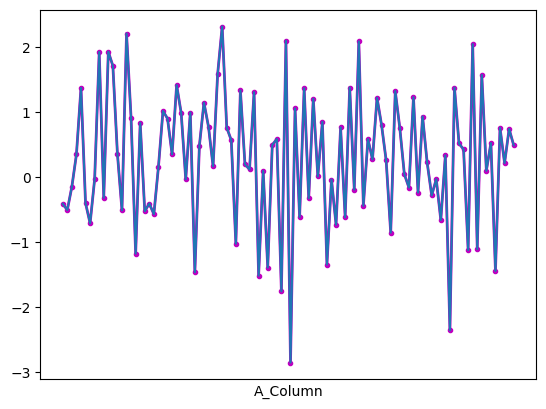

In [6]:
x = df["A"]
plt.plot(x,color='m', marker='o', linewidth=2, markersize=3)
plt.plot(x)
plt.xticks([])
plt.xlabel("A_Column")
plt.show()

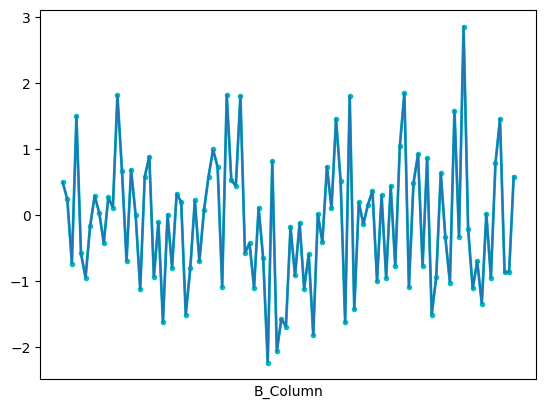

In [7]:
x = df["B"]
plt.plot(x,color='c', marker='o', linewidth=2, markersize=3)
plt.plot(x)
plt.xticks([])
plt.xlabel("B_Column")
plt.show()

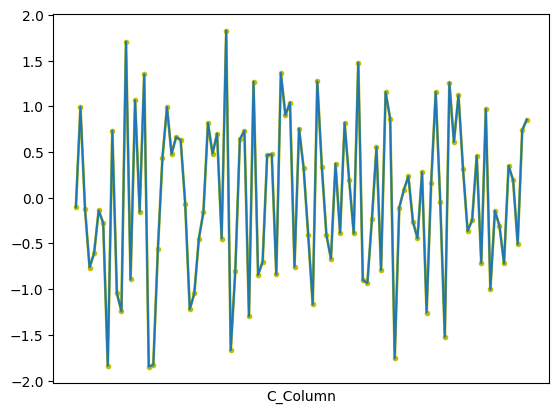

In [8]:
x = df["C"]
plt.plot(x,color='y', marker='o', linewidth=2, markersize=3)
plt.plot(x)
plt.xticks([])
plt.xlabel("C_Column")
plt.show()

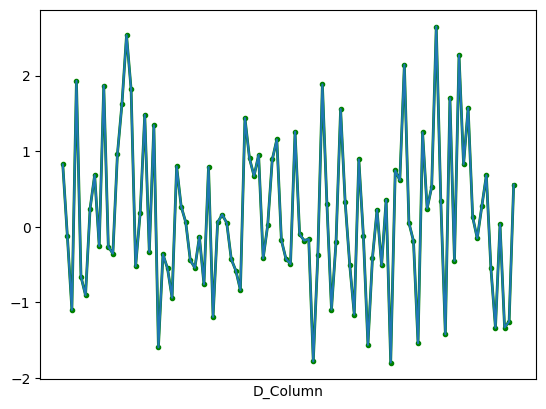

In [9]:
x = df["D"]
plt.plot(x,color='g', marker='o', linewidth=2, markersize=3)
plt.plot(x)
plt.xticks([])
plt.xlabel("D_Column")
plt.show()

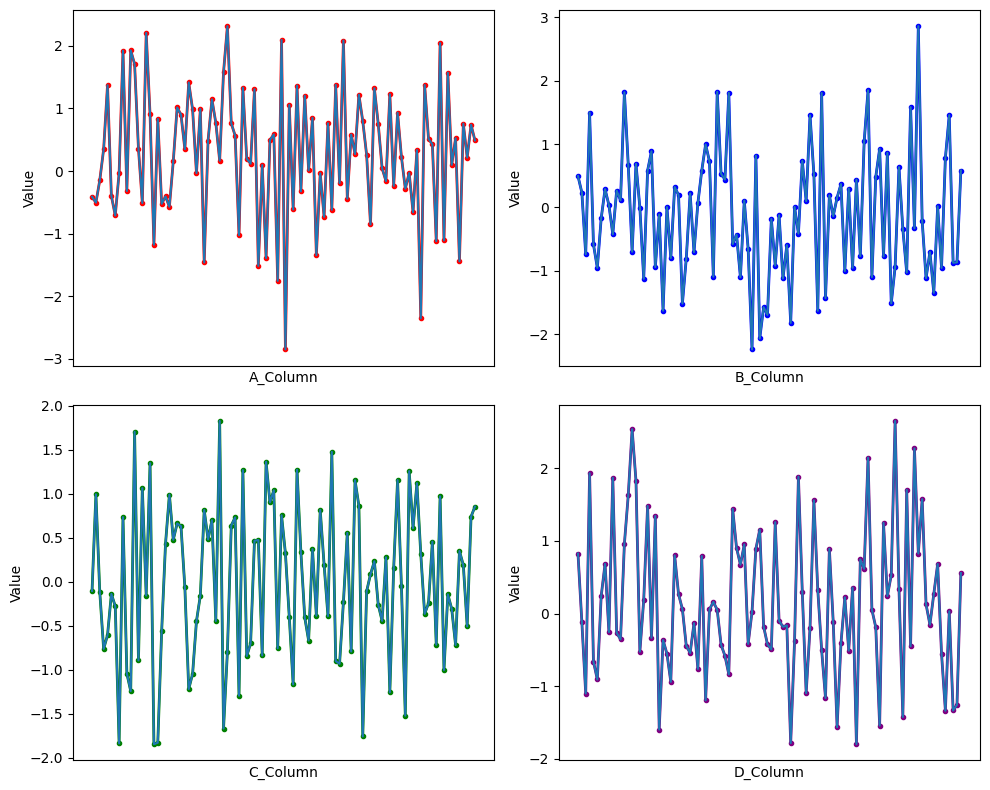

In [10]:
columns = ["A", "B", "C", "D"]
colors = ["red", "blue", "green", "purple"]  # 每個 column 的顏色
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 布局

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # 獲取當前子圖
    x = df[col]
    ax.plot(x, color=colors[i], marker='o', linewidth=2, markersize=3)
    ax.plot(x)
    ax.set_xticks([])  # 隱藏 x 軸標籤
    ax.set_xlabel(f"{col}_Column")  # 設置 x 軸標籤
    ax.set_ylabel("Value")  # 可選的 y 軸標籤

plt.tight_layout()
plt.show()


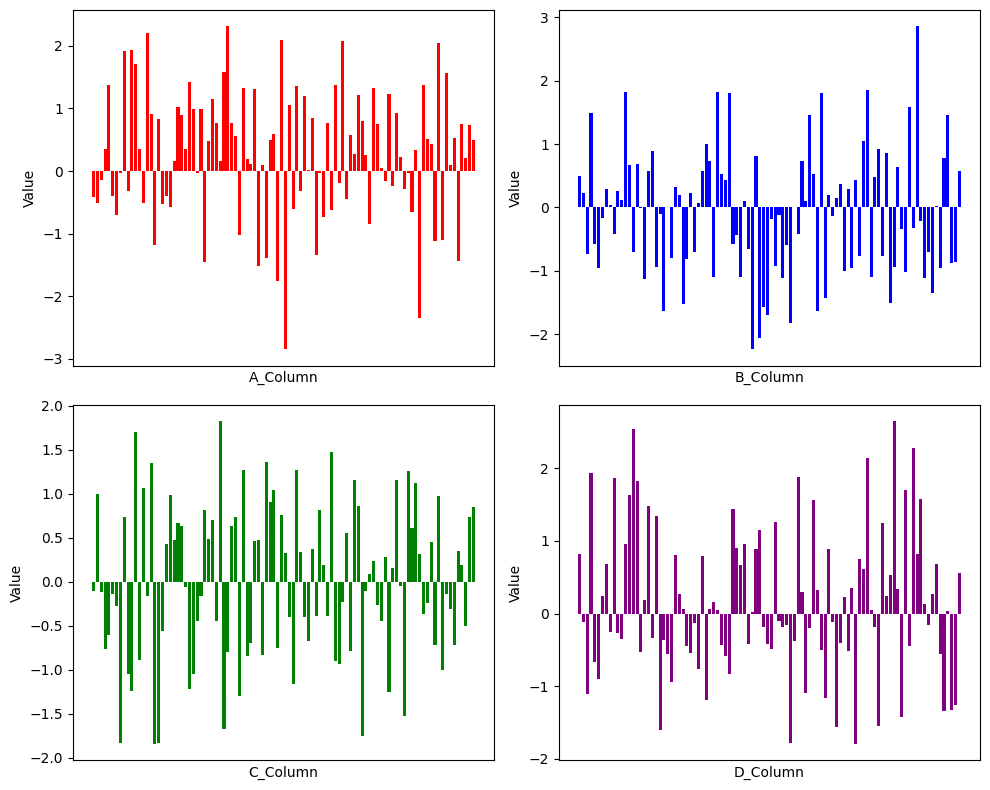

In [11]:
import matplotlib.pyplot as plt

# 假設 df 中有 A, B, C, D 四個 column
columns = ["A", "B", "C", "D"]
colors = ["red", "blue", "green", "purple"]  # 每個 column 的顏色
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 布局

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # 獲取當前子圖
    x = df[col]
    ax.bar(range(len(x)), x, color=colors[i], linewidth=2)  # 使用長條圖
    ax.set_xticks([])  # 隱藏 x 軸標籤
    ax.set_xlabel(f"{col}_Column")  # 設置 x 軸標籤
    ax.set_ylabel("Value")  # 可選的 y 軸標籤

plt.tight_layout()
plt.show()


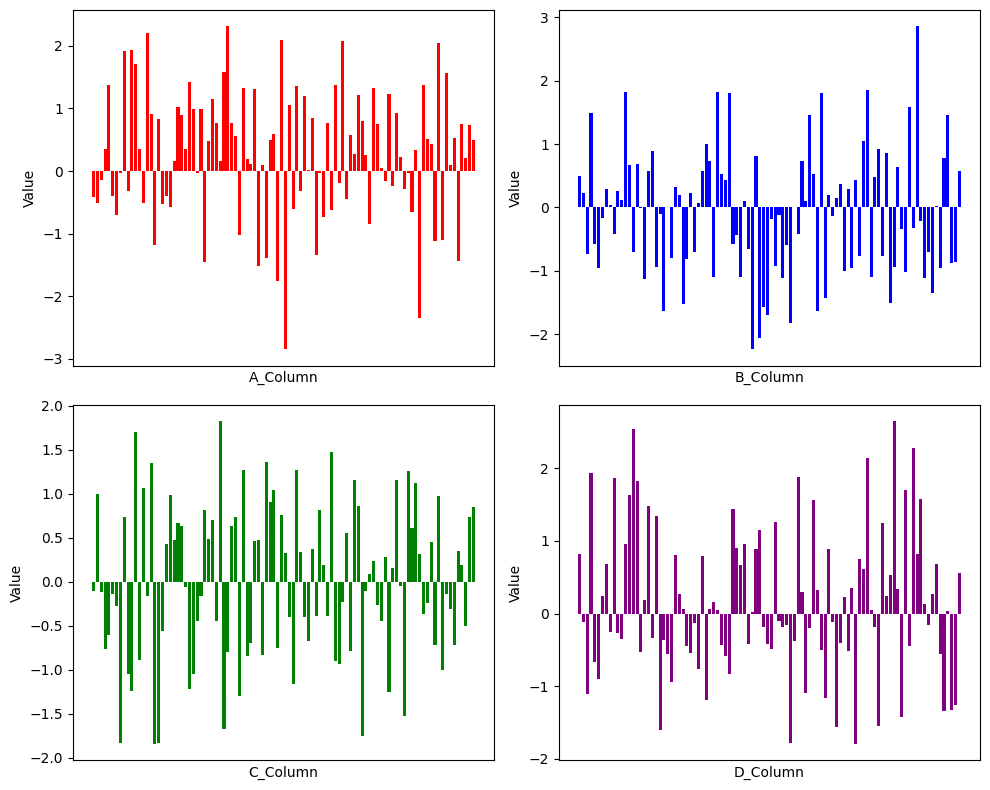

In [12]:
import matplotlib.pyplot as plt

# 假設 df 中有 A, B, C, D 四個 column
columns = ["A", "B", "C", "D"]
colors = ["red", "blue", "green", "purple"]  # 每個 column 的顏色
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 布局

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # 獲取當前子圖
    x = df[col]
    ax.bar(range(len(x)), x, color=colors[i], linewidth=2)  # 使用長條圖
    ax.set_xticks([])  # 隱藏 x 軸標籤
    ax.set_xlabel(f"{col}_Column")  # 設置 x 軸標籤
    ax.set_ylabel("Value")  # 可選的 y 軸標籤

plt.tight_layout()
plt.show()


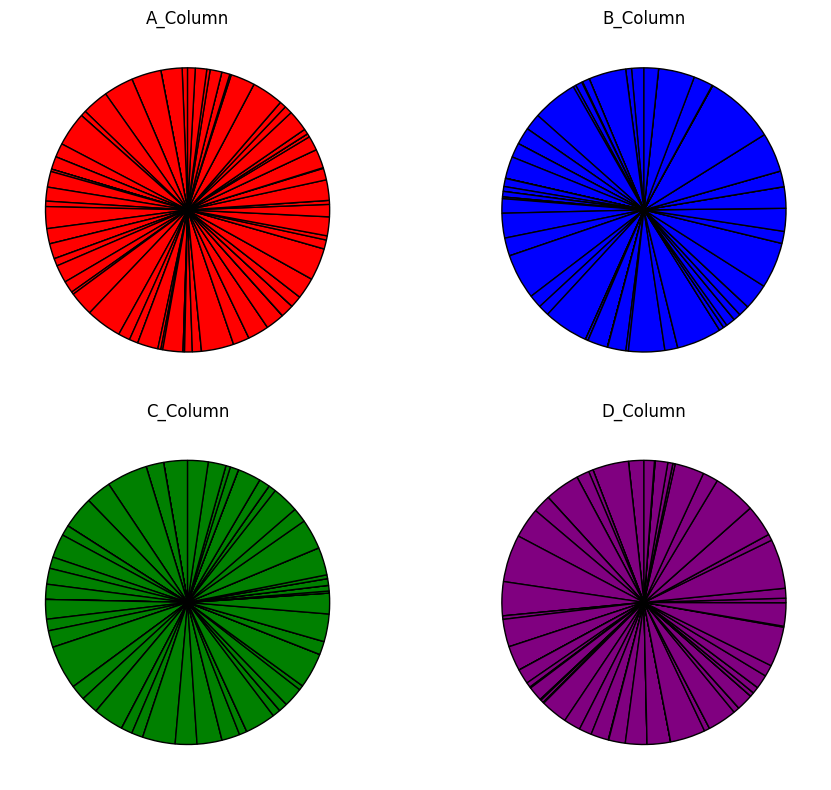

In [13]:
columns = ["A", "B", "C", "D"]
colors = ["red", "blue", "green", "purple"]  # 每個 column 的主色調
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 布局

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # 獲取當前子圖
    x = df[col].apply(lambda v: max(v, 0))  # 將負值替換為0，避免錯誤
    if x.sum() == 0:
        x += 1  # 確保總和不為0，以防止畫不出圓餅圖
    ax.pie(
        x, 
        colors=[colors[i]] * len(x), 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}  # 設置黑色分隔線
    )
    ax.set_title(f"{col}_Column")  # 設置子圖標題

plt.tight_layout()
plt.show()


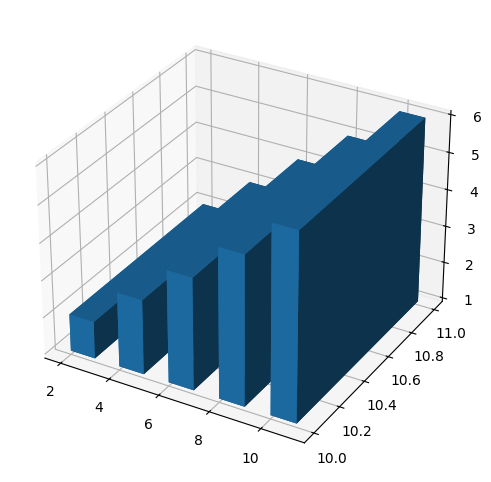

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
x = [2,4,6,8,10]
y = 10
z = 1
ax.bar3d(x,y,z,dx=1,dy=1,dz=[1,2,3,4,5])
plt.show()

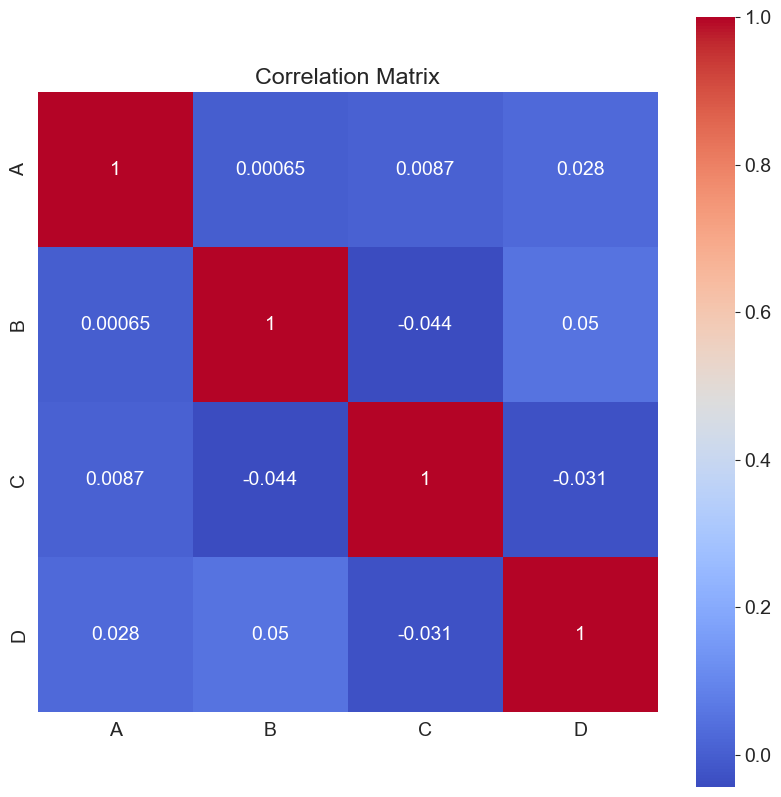

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 繪製相關矩陣的熱圖
corrMatrix = df.corr()
plt.figure(figsize=(10, 10))  # 單獨為相關矩陣設置大小
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", square=True)  # 使用 coolwarm 色彩映射
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# 使用scipy.stats.f_oneway 進行單因子 ANOVA 檢定
f_statistic, p_value = stats.f_oneway(df['A'], df['B'], df['C'] ,df['D'])
# 輸出結果
print("F 統計量:", f_statistic)
print("p-value:", p_value)
# 解釋結果
alpha = 0.05  # 顯著性水平
if p_value < alpha:
    print("拒絕原假設：不同組別之間的均值存在顯著差異。")
else:
    print("未能拒絕原假設：不同組別之間的均值沒有顯著差異。")


F 統計量: 3.075784934747542
p-value: 0.02757418593716714
拒絕原假設：不同組別之間的均值存在顯著差異。


In [24]:
# 生成100行數據
A = list(range(100))  # 0到99作為Score
B = [random.choice(['A', 'B', 'C', 'D']) for _ in range(100)]  # 隨機選擇A到D作為Method

# 創建DataFrame
df2 = pd.DataFrame({'Score': A, 'Method': B})

# 檢查列名
print(df2.columns)

# 使用OLS模型來進行ANOVA分析
model = ols('Score ~ C(Method)', data=df2).fit()  # 'C(Method)' 表示將Method列視為分類變量
anova_table = sm.stats.anova_lm(model, typ=2)

# 顯示ANOVA結果
print(anova_table)


Index(['Score', 'Method'], dtype='object')
                 sum_sq    df         F    PR(>F)
C(Method)    750.278205   3.0  0.290754  0.831981
Residual   82574.721795  96.0       NaN       NaN
